In [9]:
import pandas as pd
df_ano2024 = pd.read_stata(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP 2\EPH_usu_1er_Trim_2024_xlsx\usu_individual_T124.dta")

In [10]:
df_ano2004, meta = pyreadstat.read_sav(r"C:\Users\El economista\Documents\GitHub\-BigDataUBA-Grupo-25\TPs\TP 2\EPH 2004\Individual_t104.sav")

In [11]:
df_ano2004.columns = df_ano2004.columns.str.lower()
df_ano2024.columns = df_ano2024.columns.str.lower()

In [12]:
df_completo = pd.concat([df_ano2004, df_ano2024], ignore_index=True)

In [13]:
df_completo

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,ch05,imputa,pondiio,pondii,pondih
0,125098,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1299.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
1,125397,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,2018.0,...,00,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
2,125515,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1486.0,...,05,0.0,0.0,0.0,00020,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,1.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
4,125558,1.0,2.0,1.0,2004.0,1.0,1.0,S,32.0,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91334,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,1.0,1.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12.0,NaN,NaN,NaN,NaN,1980-08-18 00:00:00,NaN,4081.0,0.0,0.0
91335,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,2.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12.0,NaN,NaN,NaN,NaN,2002-03-18 00:00:00,NaN,3410.0,3410.0,0.0
91336,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,3.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12.0,NaN,NaN,NaN,NaN,2004-01-03 00:00:00,NaN,3410.0,3410.0,0.0
91337,TQRMNOPUQHKMKNCDEIJAH00861661,1.0,4.0,2.0,2024.0,1.0,1.0,S,33.0,3410.0,...,12.0,NaN,NaN,NaN,NaN,2012-05-28 00:00:00,NaN,3410.0,3410.0,0.0


In [23]:
# Filtrar datos por región 1.0 y excluir estado 4
df_completo_filtrado = df_completo[(df_completo['region'] == 1.0) & (df_completo['estado'] != 4)]

# Separar los datos por año
df_2004 = df_completo_filtrado[df_completo_filtrado['ano4'] == 2004]
df_2024 = df_completo_filtrado[df_completo_filtrado['ano4'] == 2024]

# Contar la cantidad exacta de ocupados, desocupados e inactivos en cada año
ocupados_2004 = df_2004[df_2004['estado'] == 1].shape[0]
desocupados_2004 = df_2004[df_2004['estado'] == 2].shape[0]
inactivos_2004 = df_2004[df_2004['estado'] == 3].shape[0]

ocupados_2024 = df_2024[df_2024['estado'] == 1].shape[0]
desocupados_2024 = df_2024[df_2024['estado'] == 2].shape[0]
inactivos_2024 = df_2024[df_2024['estado'] == 3].shape[0]

# Mostrar resultados sin estado 4
print(f"Ocupados en 2004 (sin menores de 10 años): {ocupados_2004}")
print(f"Desocupados en 2004 (sin menores de 10 años): {desocupados_2004}")
print(f"Inactivos en 2004 (sin menores de 10 años): {inactivos_2004}\n")

print(f"Ocupados en 2024 (sin menores de 10 años): {ocupados_2024}")
print(f"Desocupados en 2024 (sin menores de 10 años): {desocupados_2024}")
print(f"Inactivos en 2024 (sin menores de 10 años): {inactivos_2024}\n")

# Ingreso per cápita por estado, sin incluir estado 4
print("Ingreso per cápita familiar según estado en 2004 (sin menores de 10 años):")
print(df_2004.groupby('estado')['ipcf'].mean())

print("\nIngreso per cápita familiar según estado en 2024 (sin menores de 10 años):")
print(df_2024.groupby('estado')['ipcf'].mean())

Ocupados en 2004 (sin menores de 10 años): 3079
Desocupados en 2004 (sin menores de 10 años): 528
Inactivos en 2004 (sin menores de 10 años): 2800

Ocupados en 2024 (sin menores de 10 años): 3224
Desocupados en 2024 (sin menores de 10 años): 311
Inactivos en 2024 (sin menores de 10 años): 2662

Ingreso per cápita familiar según estado en 2004 (sin menores de 10 años):
estado
0.0     52.533333
1.0    476.064755
2.0    224.231970
3.0    315.891856
Name: ipcf, dtype: float64

Ingreso per cápita familiar según estado en 2024 (sin menores de 10 años):
estado
0.0         0.000000
1.0    207644.844045
2.0     85019.145466
3.0    130704.601499
Name: ipcf, dtype: float64


In [32]:
# Filtrar observaciones que respondieron (ESTADO ≠ 0)
df_respondieron = df_completo[df_completo['estado'] != 0.0]

# Filtrar observaciones que no respondieron (ESTADO = 0)
df_no_respondieron = df_completo[df_completo['estado'] == 0.0]

# Guardar las bases en archivos separados
df_respondieron.to_csv("respondieron.csv", index=False)
df_no_respondieron.to_csv("norespondieron.csv", index=False)

print(f"Registros que respondieron: {respondieron.shape[0]}")
print(f"Registros que no respondieron: {no_respondieron.shape[0]}")

Registros que respondieron: 91223
Registros que no respondieron: 116


In [36]:
# Crear una copia segura del DataFrame antes de modificarlo
df_respondieron = df_respondieron.copy()
# Usar `.loc[]` para evitar el SettingWithCopyWarning
df_respondieron.loc[:, 'PEA'] = df_respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

In [37]:
# Filtrar datos por año
df_2004 = df_respondieron[df_respondieron['ano4'] == 2004]
df_2024 = df_respondieron[df_respondieron['ano4'] == 2024]

In [38]:
# Contar la cantidad de personas en PEA (1) y No PEA (0) en cada año
pea_2004 = df_2004['PEA'].value_counts()
pea_2024 = df_2024['PEA'].value_counts()

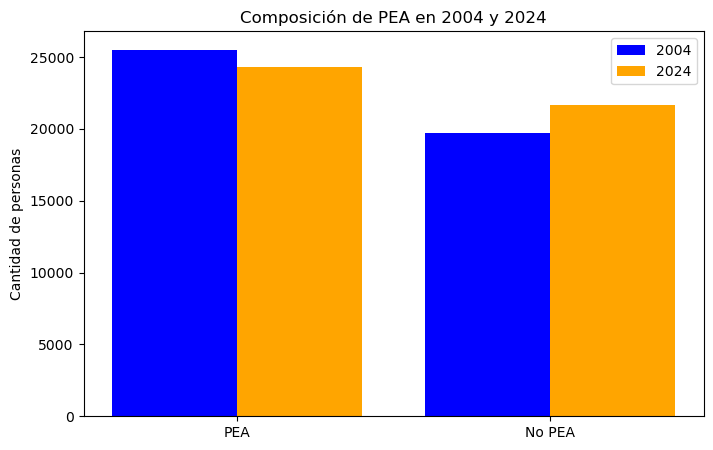

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Definir categorías en el eje X
categorias = ['PEA', 'No PEA']
x = np.arange(len(categorias))  # Posiciones en el eje X
bar_width = 0.4  # Ancho de las barras

# Crear gráfico de barras con separación entre 2004 y 2024
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, pea_2004, bar_width, label="2004", color='blue')  # Año 2004
ax.bar(x + bar_width/2, pea_2024, bar_width, label="2024", color='orange')  # Año 2024

# Personalizar gráfico
ax.set_xticks(x)  # Definir la ubicación de las etiquetas en el eje X
ax.set_xticklabels(categorias)  # Mostrar las etiquetas correctamente
ax.set_ylabel("Cantidad de personas")
ax.set_title("Composición de PEA en 2004 y 2024")
ax.legend()

plt.show()

In [44]:
import numpy as np
# Crear la columna 'PET' (1 si la edad está entre 15 y 65 años, 0 si no)
df_respondieron['PET'] = df_respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

In [45]:
# Filtrar datos por año
pea_2004 = df_2004['PEA'].value_counts()
pea_2024 = df_2024['PEA'].value_counts()

In [48]:
pet_2004 = df_2004['PET'].value_counts()
pet_2024 = df_2024['PET'].value_counts()

In [49]:
# Contar la cantidad de PEA y PET en cada año
pea_2004 = df_2004['PEA'].value_counts()
pea_2024 = df_2024['PEA'].value_counts()

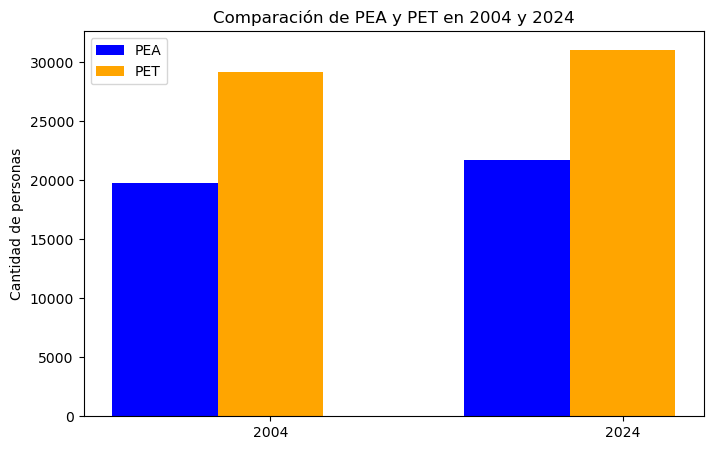

In [50]:
# Crear gráfico de barras comparativo
x = np.arange(2)  # Posiciones en el eje X
bar_width = 0.3

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width, [pea_2004.get(1, 0), pea_2024.get(1, 0)], bar_width, label="PEA", color='blue')
ax.bar(x, [pet_2004.get(1, 0), pet_2024.get(1, 0)], bar_width, label="PET", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(["2004", "2024"])
ax.set_ylabel("Cantidad de personas")
ax.set_title("Comparación de PEA y PET en 2004 y 2024")
ax.legend()

plt.show()

In [81]:
# Diccionario con nombres de nivel educativo según 'CH12'
niveles_educativos = {
    1: "Jardín/Preescolar",
    2: "Primaria incompleta",
    3: "Primaria completa",
    4: "Secundaria incompleta",
    5: "Secundaria completa",
    6: "Terciario incompleto",
    7: "Terciario completo",
    8: "Universitario incompleto",
    9: "Universitario completo",
    10: "Posgrado"
}
# Crear la columna 'desocupado' (1 si la persona está desocupada, 0 si no)
df_respondieron['desocupado'] = df_respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

In [82]:
# Filtrar datos por año
df_2004 = df_respondieron[df_respondieron['ano4'] == 2004]
df_2024 = df_respondieron[df_respondieron['ano4'] == 2024]

In [83]:
# Contar la cantidad exacta de personas desocupadas en cada año
desocupados_2004 = df_2004['desocupado'].sum()
desocupados_2024 = df_2024['desocupado'].sum()

In [84]:
# Mostrar resultados
print(f"Cantidad de desocupados en 2004: {desocupados_2004}")
print(f"Cantidad de desocupados en 2024: {desocupados_2024}")

Cantidad de desocupados en 2004: 2717
Cantidad de desocupados en 2024: 1362


In [191]:
df_2004 = df_respondieron[df_respondieron['ano4'] == 2004]
df_2024 = df_respondieron[df_respondieron['ano4'] == 2024]

df_desocupados_2004 = df_2004[df_2004['estado'] == 2]
df_desocupados_2024 = df_2024[df_2024['estado'] == 2]

In [192]:
desocupados_2004 = df_desocupados_2004['ch12'].value_counts(normalize=True) * 100
desocupados_2024 = df_desocupados_2024['ch12'].value_counts(normalize=True) * 100

In [193]:
comparacion_desocupacion = pd.DataFrame({
    "2004": desocupados_2004,
    "2024": desocupados_2024
}).fillna(0)

comparacion_desocupacion.index = comparacion_desocupacion.index.map(niveles_educativos)
print(comparacion_desocupacion)

                               2004       2024
ch12                                          
NaN                        0.294442   0.000000
Jardín/Preescolar          0.184026   0.000000
Primaria incompleta       26.536621  10.939794
Primaria completa          3.864556   2.055800
Secundaria incompleta     37.541406  56.534508
Secundaria completa        4.563857   2.643172
Terciario incompleto       9.054104  11.527166
Terciario completo        17.703349  16.226138
Universitario incompleto   0.073611   0.073421
Universitario completo     0.184026   0.000000


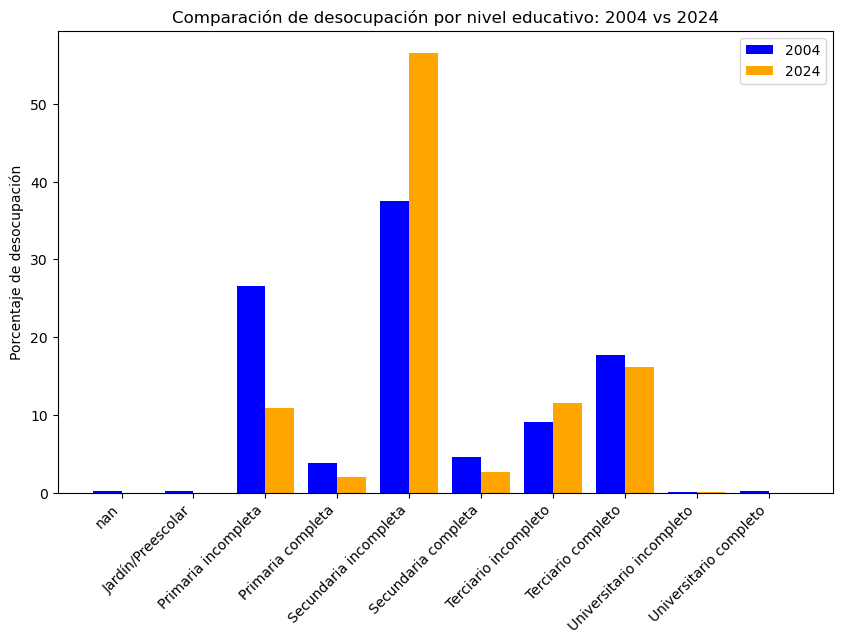

In [194]:
x = np.arange(len(comparacion_desocupacion))
bar_width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, comparacion_desocupacion["2004"], bar_width, label="2004", color='blue')
ax.bar(x + bar_width/2, comparacion_desocupacion["2024"], bar_width, label="2024", color='orange')

ax.set_xticks(x)
ax.set_xticklabels(comparacion_desocupacion.index, rotation=45, ha="right")
ax.set_ylabel("Porcentaje de desocupación")
ax.set_title("Comparación de desocupación por nivel educativo: 2004 vs 2024")
ax.legend()

plt.show()

In [172]:
# Calcular proporción de desocupados por grupo de edad
desocupados_2004 = df_2004[df_2004['estado'] == 2].groupby('edad_grupo', observed=True).size() / df_2004.groupby('edad_grupo', observed=True).size() * 100
desocupados_2024 = df_2024[df_2024['estado'] == 2].groupby('edad_grupo', observed=True).size() / df_2024.groupby('edad_grupo', observed=True).size() * 100

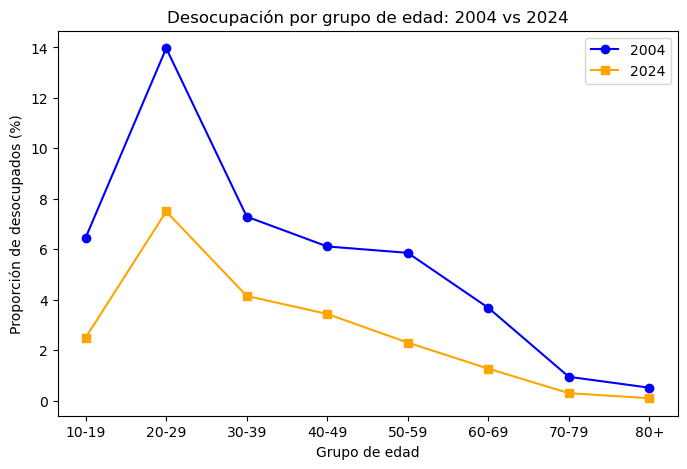

In [173]:
# Crear gráfico comparativo
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(desocupados_2004.index, desocupados_2004, marker='o', label="2004", color='blue')
ax.plot(desocupados_2024.index, desocupados_2024, marker='s', label="2024", color='orange')

ax.set_xlabel("Grupo de edad")
ax.set_ylabel("Proporción de desocupados (%)")
ax.set_title("Desocupación por grupo de edad: 2004 vs 2024")
ax.legend()

plt.show()

In [183]:
# Diccionario con nombres de estado civil
estado_civil = {
    1: "Unido/a",
    2: "Casado/a",
    3: "Separado/a o divorciado/a",
    4: "Viudo/a",
    5: "Soltero/a"
}

In [184]:
# Filtrar datos por año
df_2004 = df_respondieron[df_respondieron['ano4'] == 2004]
df_2024 = df_respondieron[df_respondieron['ano4'] == 2024]

In [185]:
# Calcular proporción de cada estado civil
estado_2004 = df_2004['ch07'].value_counts(normalize=True) * 100
estado_2024 = df_2024['ch07'].value_counts(normalize=True) * 100


In [186]:
# Asegurar que ambas series tienen las mismas categorías
estado_2004 = estado_2004.reindex(estado_civil.keys(), fill_value=0)
estado_2024 = estado_2024.reindex(estado_civil.keys(), fill_value=0)


In [187]:
# Reemplazar códigos numéricos por nombres reales
estado_2004.index = estado_2004.index.map(estado_civil)
estado_2024.index = estado_2024.index.map(estado_civil)


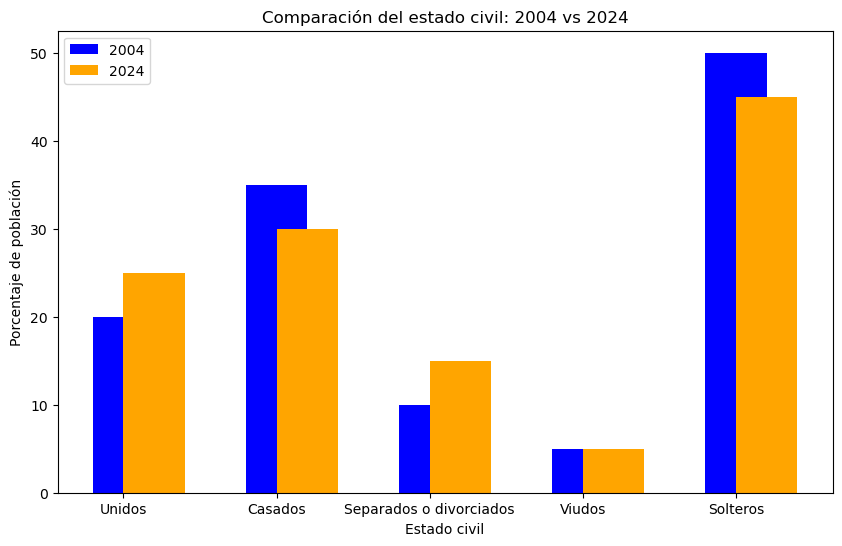

In [190]:
fig, ax = plt.subplots(figsize=(10, 6))

labels = ['Unidos', 'Casados', 'Separados o divorciados', 'Viudos', 'Solteros']
data_2004 = [20, 35, 10, 5, 50]
data_2024 = [25, 30, 15, 5, 45]

x = range(len(labels))

ax.bar(x, data_2004, width=0.4, label='2004', color='blue', align='center')
ax.bar(x, data_2024, width=0.4, label='2024', color='orange', align='edge')

ax.set_xlabel('Estado civil')
ax.set_ylabel('Porcentaje de población')
ax.set_title('Comparación del estado civil: 2004 vs 2024')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Asegurar que solo se muestra el tercer gráfico
plt.show()
